In [1]:
import numpy as np
import pandas as pd

# Read the data

In [2]:
data=pd.DataFrame()
datac=pd.read_pickle('abc.pkl')

In [3]:
datac.head()

,text,label,name,clean,ind,diet,db,split
0,\n\nRecord date: 2106-02-12\n\nCampbell Orthop...,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1]",100,"[diabetes, a, diabetic, diabetes, L, eye, visu...","[126, 16, 126, 126, 231, 169, 451, 142, 375, 4...",1,1,"[diabetes, a, diabetic, diabetes, L, eye, visu..."
1,\n\nRecord date: 2079-05-12\n\n\n\n\n\nMERCY C...,"[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]",101,[],[],0,0,[]
2,\n\nRecord date: 2120-09-19\n\nPersonal Data a...,"[1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0]",102,"[diabetes, Diabetic, medications, diabetes, Re...","[126, 126, 266, 126, 352, 448, 271, 126, 352, ...",0,1,"[diabetes, Diabetic, medications, diabetes, Re..."
3,\n\nRecord date: 2067-11-24\n\n ...,"[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]",103,"[non-insulin-dependent, diabetes, diabetes, me...","[290, 126, 126, 268, 126, 126, 126, 126]",0,0,"[non-insulin-dependent, diabetes, diabetes, me..."
4,\n\nRecord date: 2094-02-16\n\nJENNIFER BOOKER...,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1]",104,"[UTI, in, diabetic, Diabetes, mellitus, Neurop...","[446, 211, 126, 126, 268, 283, 126, 268, 126, ...",0,1,"[UTI, in, diabetic, Diabetes, mellitus, Neurop..."


# Compute the size of Vocab and text

In [4]:
import nltk
from sklearn import preprocessing
we = preprocessing.LabelEncoder()
pstemmer = nltk.lancaster.LancasterStemmer()

vocabc  = set([pstemmer.stem(i) for x in datac.split for i in x])

In [5]:
len(vocabc) 

462

In [6]:
from keras.preprocessing import sequence

datac['lens'] = datac.ind.map(lambda x: len(x))
maxlenc = max(datac.lens)
maxlenc

Using TensorFlow backend.


13710

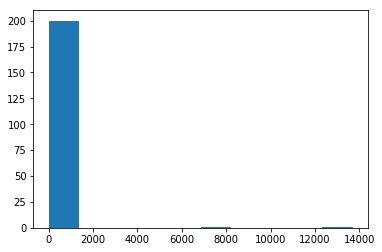

In [7]:
import matplotlib.pyplot as plt
plt.hist(datac.lens)
plt.show()

In [8]:
datac = datac[datac.lens < 5000]
maxlenc = max(datac.lens)

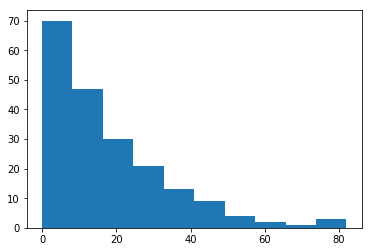

In [9]:
import matplotlib.pyplot as plt
plt.hist(datac.lens)
plt.show()

In [10]:
datac['db']=datac.label.map(lambda x: x[10])

# Labels Dist

0. ABDOMINAL--------- 38.50
1. ADVANCED-CAD------ 62.50
2. ALCOHOL-ABUSE-----  3.50
3. ASP-FOR-MI-------- 81.00
4. CREATININE-------- 41.00
5. DIETSUPP-2MOS----- 52.50
6. DRUG-ABUSE--------  6.00
7. ENGLISH----------- 96.00
8. HBA1C------------- 33.50
9. KETO-1YR----------  0.50
10. MAJOR-DIABETES---- 56.50
11. MAKES-DECISIONS--- 97.00
12. MI-6MOS-----------  9.00


### Creating Train data

In [11]:
#datac=datac.sample(frac=0.05)
trainc=datac.sample(frac=0.8,random_state=100)
testc=datac.drop(trainc.index)

trainc.shape, testc.shape

((160, 9), (40, 9))

In [12]:
X_trainc = sequence.pad_sequences(trainc.ind, maxlen=maxlenc)
X_trainc = np.array([x.ravel() for x in X_trainc])

In [13]:
y_trainc = np.array([x for x in trainc.db])
y_trainc.shape

(160,)

# Creating and Training NN Model - Clamp

In [14]:
import numpy
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
from keras.layers import Dropout
from keras.preprocessing import sequence
import numpy as np
import random


modelc = Sequential()
modelc.add(Embedding(len(vocabc), maxlenc, input_length=X_trainc.shape[1]))
modelc.add(Dense(200, activation='tanh'))
modelc.add(Dropout(0.5))
modelc.add(LSTM(100))
modelc.add(Dense(1, activation='sigmoid'))
modelc.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])
print(modelc.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 82, 82)            37884     
_________________________________________________________________
dense_1 (Dense)              (None, 82, 200)           16600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 82, 200)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               120400    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 174,985
Trainable params: 174,985
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
modelc.fit(X_trainc, y_trainc, batch_size=128, epochs=10)

Epoch 1/10
160/160 [==============================] - 2s 9ms/step - loss: 0.6775 - acc: 0.5625
Epoch 2/10
160/160 [==============================] - 1s 5ms/step - loss: 2.0243 - acc: 0.4375
Epoch 3/10
160/160 [==============================] - 1s 4ms/step - loss: 0.5679 - acc: 0.7000
Epoch 4/10
160/160 [==============================] - 1s 4ms/step - loss: 0.5197 - acc: 0.7562
Epoch 5/10
160/160 [==============================] - 1s 4ms/step - loss: 0.4536 - acc: 0.7875
Epoch 6/10
160/160 [==============================] - 1s 4ms/step - loss: 0.5685 - acc: 0.6688
Epoch 7/10
160/160 [==============================] - 1s 5ms/step - loss: 0.3848 - acc: 0.8438
Epoch 8/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3181 - acc: 0.8875
Epoch 9/10
160/160 [==============================] - 1s 4ms/step - loss: 0.2676 - acc: 0.9125
Epoch 10/10
160/160 [==============================] - 1s 4ms/step - loss: 0.2302 - acc: 0.9250


In [16]:
modelc.save('Trained Models/model-bca.h5')